# Prediction using Unsupervised ML - K-Means Clustering

## Data set

The Iris flower data set or Fisher's Iris data set is a multivariate data set

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    Iris Setosa
    Iris Versicolour
    Iris Virginica

## Problem statement

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.1f}'.format

from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 1.	Load the data (Iris.csv) file 

In [2]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dropping column 'Id' as it is not required for the analysis
df_iris =df_iris.drop(['Id'],1) 

In [4]:
df_iris.shape # There are 150 observations and 5 columns in the iris dataset

(150, 5)

In [5]:
df_iris.dtypes 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<!-- #### `SepalWidthCm` is wrongly identified as object datatype. -->

In [6]:
df_iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Checking for null values

In [7]:
df_iris.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# No null values in the dataset

### Checking for outliers and treating them using IQR method

In [9]:
df_num = df_iris.select_dtypes(include = 'number')

In [10]:
df_num.shape

(150, 4)

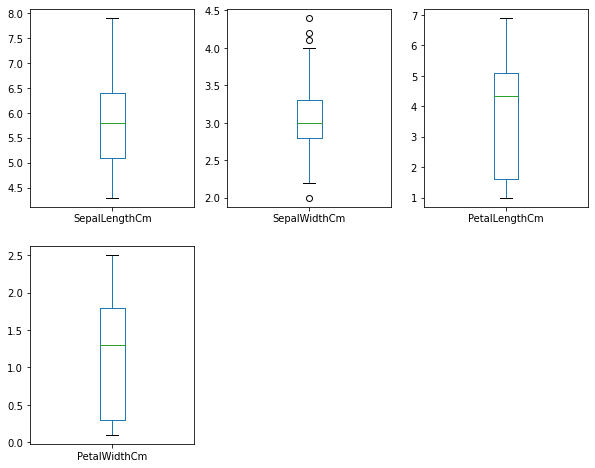

In [11]:
df_num.plot(kind = 'box',subplots = True, layout = [2,3],sharex = False, figsize = [10,8])
plt.show()

<!-- ### Removing outliers from 'SepalWidthCm' -->

In [12]:
# calculate the first quartile
Q1 = df_iris.quantile(0.25)

#calculate the third quartile
Q3 = df_iris.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
df_iris = df_iris[~((df_iris < (Q1 - 1.5 * IQR)) | (df_iris > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iris = df_iris.reset_index(drop=True)

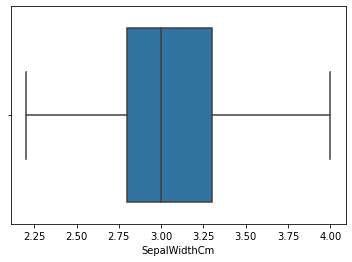

In [13]:
sns.boxplot(df_iris['SepalWidthCm'])
plt.show()

In [ ]:
# Effect of outliers has been reduced

### Scaling the features using StandardScaler from Scikitlearn

Scaling is very important before clustering. It is used when we need to represent pysical reality in a mathematical space.
There are different scaling techniques such as Min-Max scaling, z-score, Standard scaling etc.
Here I am using StandarScaler technique from scikitlearn.

In [14]:
# Removing class variable 'Species' 

X = df_iris.iloc[:, 0:4] 

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_sc, columns = X.columns)
X_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.9,1.2,-1.4,-1.3
1,-1.2,-0.1,-1.4,-1.3
2,-1.4,0.4,-1.4,-1.3
3,-1.5,0.2,-1.3,-1.3
4,-1.0,1.4,-1.4,-1.3


### Perform KMeans clustering with (K=3) 

In [16]:
y = df_iris.iloc[:, 4] 

In [17]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state = 101)

In [18]:
cluster_range  = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters, init ='k-means++', random_state = 1)
    kmeans.fit(X_scaled)
    cluster_errors.append(kmeans.inertia_)
    
clusters_df = pd.DataFrame({'Num_Clusters': cluster_range, 'Inertia' :  cluster_errors})
clusters_df

,Num_Clusters,Inertia
0,1,584.0
1,2,218.9
2,3,135.4
3,4,110.6
4,5,89.4
5,6,78.1
6,7,68.3
7,8,61.9
8,9,52.5
9,10,45.9


### Plotting Elbow plot  to find the optimum value of K 

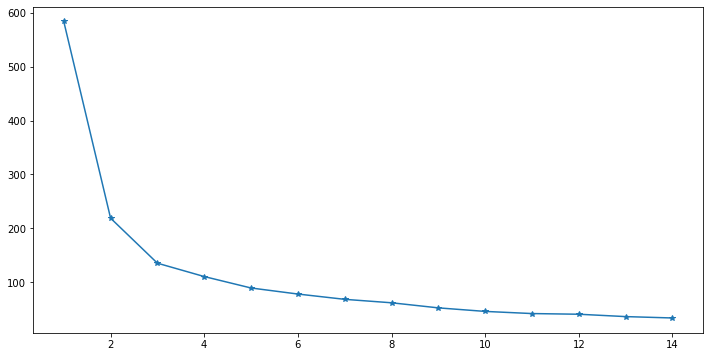

In [19]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df['Num_Clusters'],clusters_df['Inertia'],marker = '*' )
plt.show()

#### From the above visualization, we can see that the optimal number of clusters should be around 3 as the sum of squared errors(Inertia) tapered off. This point is known as the Elbow or Knee which tells us the optimal K value.

### Training the Algorithm with the optimun number of clusters identified from the elbow plot. 

Which is k =3 and initialization as 'k-means++'. The 'k-means++' schema implemented in scikit learn initializes centroid to be distant to one another which leads to better result. 

In [20]:
kmeans  = KMeans(n_clusters=3, init = 'k-means++',random_state=101)

kmeans.fit(X_scaled)

y_kmeans = kmeans.fit_predict(X_scaled)

In [21]:
# centroids for the clusters.
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = X_scaled.columns)
centroids_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.1,0.8,-1.3,-1.3
1,0.0,-0.9,0.4,0.3
2,1.1,0.2,1.0,1.0


In [22]:
# Creating dataframe for labels and converting it as 'object'

df_labels = pd.DataFrame(kmeans.labels_, columns = list(['Labels'])) 

df_labels['Labels'] = df_labels['Labels'].astype('object')

In [23]:
# Joining the label dataframe with the iris data frame to create a new dataframe called df_k

In [24]:
df_k = df_iris.join(df_labels)

In [25]:
df_k.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


### Comparing Original Classes and K-Means Algorithm Classes:

In [26]:
print('Original Data Classes:')
print(df_iris['Species'].value_counts())

print('-' * 30)

print('K-Means Classes:')
print(df_k['Labels'].value_counts())

Original Data Classes:
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64
------------------------------
K-Means Classes:
1    56
0    47
2    43
Name: Labels, dtype: int64


### Representing the original and predicted clusters visually

For visualization I will use only two features (SepalLengthCm and SepalWidthCm) for the original and predicted datasets. Different classes will have seperate color and styles.

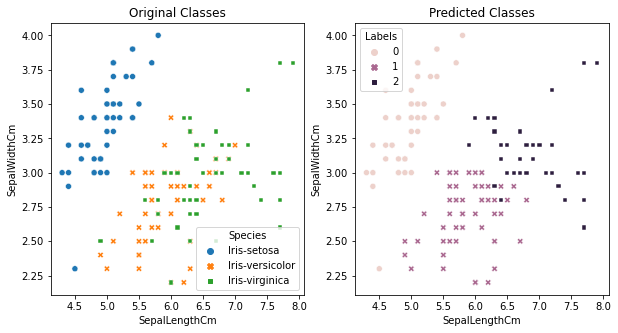

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue= 'Species', style='Species', data = df_iris, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Labels', style='Labels', data=df_k, ax=ax2)
plt.show()

It is evident from 'Iris' dataset, While comparing with the original classes and the predicted classes visually, the optimum number of clusters which we can make out is 3.

#                                          Thank you !